**Preparation**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install keras
!pip install numpy

File from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries and Show Image

Enter the picture file path :/content/sample_data/kunci-jawaban-tema-9-kelas-6-sd-halaman-68-69-70-71-72-73-buku-tematik-pembelajaran-6.jpg


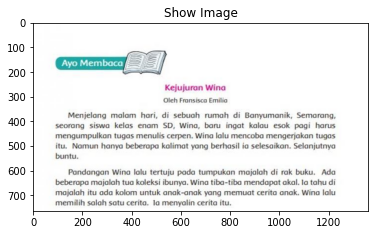

In [ ]:
import pytesseract
import cv2
import matplotlib.pylab as plt
import numpy as np

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract' #we know from the !which tesseract command

#Ask the user to input text file path
path = input("Enter the picture file path :")

#Read the image
img = cv2.imread(path)
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Show image to user
plt.title('Show Image')
plt.imshow(img)

In [ ]:
img_to_char = pytesseract.image_to_string(img)
print(img_to_char)

 
   

Ayo Memba

Kejujuran Wina

Oleh Fransisca Emilia

Menjelang malam hari, di sebuah rumah di Banyumanik, Semarang,
seorang siswa kelas enam SD, Wina, baru ingat kalau esok pagi harus
mengumpulkan tugas menulis cerpen. Wina lalu mencoba mengerjakan tugas

itu. Namun hanya beberapa kalimat yang berhasil ia selesaikan. Selanjutnya
buntu.

Pandangan Wing lalu tertuju pada tumpukan majalah di rak buku. Ada
beberapa majalah tua koleksi ibunya. Wina tiba-tiba mendapat akal. la tahu di
majalah itu ada kolom untuk anak-anak yang memuat cerita anak, Wina lalu
memilih salah satu cerita. la menyalin cerita itu.



**Make Prediction with Trained Model**

In this section the program will make prediction based on the model.h5 that previously already been builded

In [ ]:
from keras.models import load_model

#Load Model
model = load_model("/content/sample_data/model.h5")

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

#Import tokenizer with pickle
with open('/content/sample_data/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [ ]:
#Make prediction
prediction = 0
sentence = img_to_char
sentence = sentence.split(".")

sequences = loaded_tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=16, padding="post", truncating="post")
predict = model.predict(padded)

for i in range(len(predict)) :
  prediction += predict[i]

prediction = prediction/len(predict)

if prediction<0.5 :
  print("Cerita Layak Dibaca Anak")
else :
  print("Cerita Tidak Layak Dibaca Anak")

Cerita Layak Dibaca Anak
